In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
data = pd.read_table('data/COADREAD.rnaseqv2__illuminaga_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt', header=0, skiprows=[1], index_col=0)

In [3]:
data_logged = data.copy()
data_logged = np.log(data_logged)
data_logged.replace([np.inf, -np.inf], np.nan, inplace=True)

In [4]:
cell_type_info=pd.read_table('data/clinical/COADREAD.clin.merged.txt',index_col=0,skiprows=16)
cell_type_info=cell_type_info.loc["patient.tumor_tissue_site"]
cell_type_info={str(cell_type_info.index[i]):str(cell_type_info[i]) for i in range(len(cell_type_info))}
cell_type_to_color={'colon':"blue","rectum":"red","nan":"green"}
cell_type_info

{'tcga-3l-aa1b': 'colon',
 'tcga-4n-a93t': 'colon',
 'tcga-4t-aa8h': 'colon',
 'tcga-5m-aat4': 'colon',
 'tcga-5m-aat6': 'colon',
 'tcga-5m-aate': 'colon',
 'tcga-a6-2671': 'colon',
 'tcga-a6-2672': 'colon',
 'tcga-a6-2674': 'colon',
 'tcga-a6-2675': 'colon',
 'tcga-a6-2676': 'colon',
 'tcga-a6-2677': 'colon',
 'tcga-a6-2678': 'colon',
 'tcga-a6-2679': 'colon',
 'tcga-a6-2680': 'colon',
 'tcga-a6-2681': 'colon',
 'tcga-a6-2682': 'colon',
 'tcga-a6-2683': 'colon',
 'tcga-a6-2684': 'colon',
 'tcga-a6-2685': 'colon',
 'tcga-a6-2686': 'colon',
 'tcga-a6-3807': 'colon',
 'tcga-a6-3808': 'colon',
 'tcga-a6-3809': 'colon',
 'tcga-a6-3810': 'colon',
 'tcga-a6-4105': 'colon',
 'tcga-a6-4107': 'colon',
 'tcga-a6-5656': 'colon',
 'tcga-a6-5657': 'colon',
 'tcga-a6-5659': 'colon',
 'tcga-a6-5660': 'colon',
 'tcga-a6-5661': 'colon',
 'tcga-a6-5662': 'colon',
 'tcga-a6-5664': 'colon',
 'tcga-a6-5665': 'colon',
 'tcga-a6-5666': 'colon',
 'tcga-a6-5667': 'colon',
 'tcga-a6-6137': 'colon',
 'tcga-a6-61

### Replace all NaNs with lowest possible values in matrix

In [5]:
a = list(data_logged.min())
lowest_possible_exp_value = math.floor(min(a))
# We want to replace all NaNs with a very small value.
# The smallest value is almost -5, therefore we can replace all NaNs with -5
# to ensure that an NaN represents the floor of the range.
data_logged.replace(np.nan, lowest_possible_exp_value, inplace=True)

### Take PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA()

In [8]:
# Taking the transpose of the matrix get PCA (variance) across patients (and not genes).
reduced_data = pca.fit_transform(data_logged.transpose())
len(reduced_data)

263

### Observe explained variance ratio.

In [9]:
# Explanation of the percentage of variance of the dataset represented by the top five componenets.
for variance_ratio in pca.explained_variance_ratio_[:5]:
    print(variance_ratio * 100)

7.48207768416
4.79922055475
3.71248121282
2.22204909998
1.89775374652


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

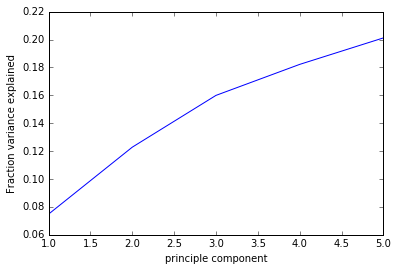

In [11]:
plt.plot(range(1,6), np.cumsum(pca.explained_variance_ratio_[0:5]))
plt.xlabel('principle component')
plt.ylabel('Fraction variance explained')

In [12]:
def plot_pca_components(x_axis_pc, y_axis_pc):
    plt.figure(figsize=(10,6))
    clrs=[cell_type_to_color[cell_type_info[str.lower(x)[:12]]] for x in data_logged.columns]
    for i, name in enumerate(data_logged.columns.tolist()):
        plt.scatter(reduced_data[i,x_axis_pc], reduced_data[i,y_axis_pc],c=clrs[i])
    plt.axvline()
    plt.axhline()
    plt.xlabel('PC'+str(x_axis_pc+1)+ ' (%.3f variance explained)'%pca.explained_variance_ratio_[x_axis_pc])
    plt.ylabel('PC'+str(y_axis_pc+1)+ ' (%.3f variance explained)'%pca.explained_variance_ratio_[y_axis_pc])

In [13]:
# [cell_type_to_color[cell_type_info[str.lower(x)[:12]]] for x in data_logged.columns]
cell_type_info

{'tcga-3l-aa1b': 'colon',
 'tcga-4n-a93t': 'colon',
 'tcga-4t-aa8h': 'colon',
 'tcga-5m-aat4': 'colon',
 'tcga-5m-aat6': 'colon',
 'tcga-5m-aate': 'colon',
 'tcga-a6-2671': 'colon',
 'tcga-a6-2672': 'colon',
 'tcga-a6-2674': 'colon',
 'tcga-a6-2675': 'colon',
 'tcga-a6-2676': 'colon',
 'tcga-a6-2677': 'colon',
 'tcga-a6-2678': 'colon',
 'tcga-a6-2679': 'colon',
 'tcga-a6-2680': 'colon',
 'tcga-a6-2681': 'colon',
 'tcga-a6-2682': 'colon',
 'tcga-a6-2683': 'colon',
 'tcga-a6-2684': 'colon',
 'tcga-a6-2685': 'colon',
 'tcga-a6-2686': 'colon',
 'tcga-a6-3807': 'colon',
 'tcga-a6-3808': 'colon',
 'tcga-a6-3809': 'colon',
 'tcga-a6-3810': 'colon',
 'tcga-a6-4105': 'colon',
 'tcga-a6-4107': 'colon',
 'tcga-a6-5656': 'colon',
 'tcga-a6-5657': 'colon',
 'tcga-a6-5659': 'colon',
 'tcga-a6-5660': 'colon',
 'tcga-a6-5661': 'colon',
 'tcga-a6-5662': 'colon',
 'tcga-a6-5664': 'colon',
 'tcga-a6-5665': 'colon',
 'tcga-a6-5666': 'colon',
 'tcga-a6-5667': 'colon',
 'tcga-a6-6137': 'colon',
 'tcga-a6-61

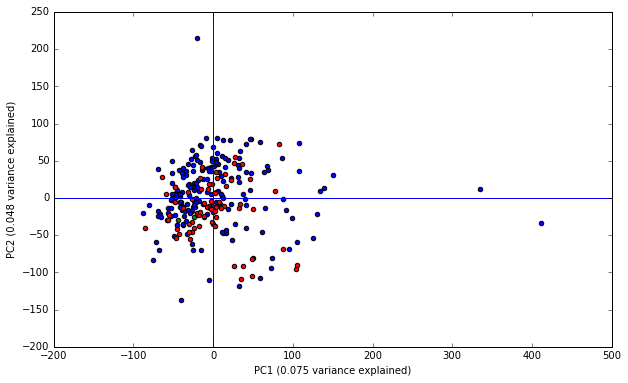

In [14]:
plot_pca_components(0, 1)

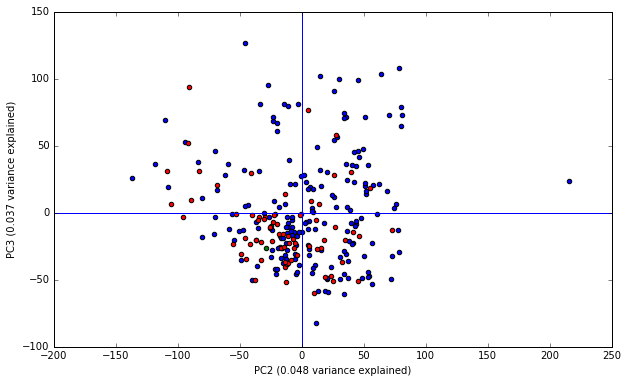

In [15]:
plot_pca_components(1, 2)

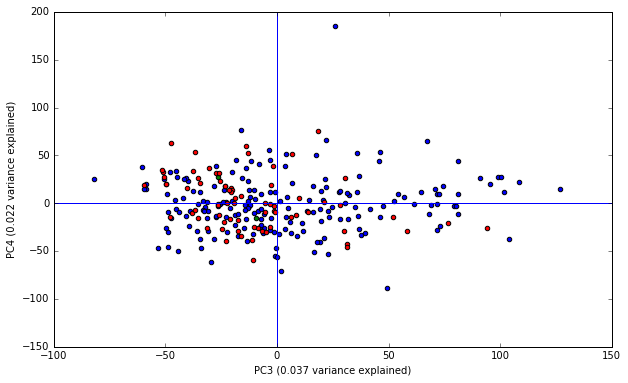

In [16]:
plot_pca_components(2, 3)

### Scaled data

In [17]:
from sklearn.preprocessing import scale

In [18]:
pca = PCA(n_components=5)

In [19]:
scaled_data = scale(data_logged.transpose())
fit = pca.fit(scaled_data)
scaled_pca = pca.transform(scaled_data)

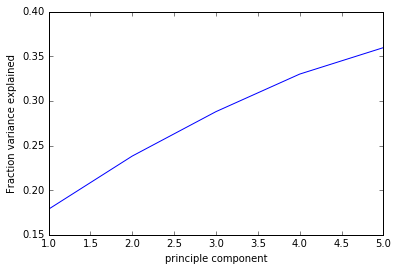

In [20]:
plt.plot(range(1,6), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principle component')
plt.ylabel('Fraction variance explained')

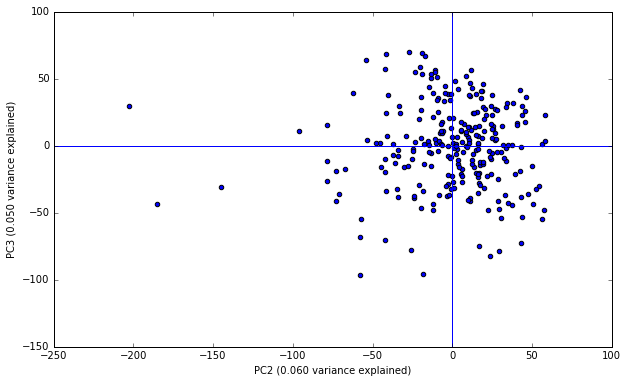

In [21]:
plt.figure(figsize=(10,6))
for i, name in enumerate(data_logged.columns.tolist()):
    color = 'blue'
    plt.scatter(scaled_pca[i,1], scaled_pca[i,2], c=color)
plt.axvline()
plt.axhline()
plt.xlabel('PC2 (%.3f variance explained)'%pca.explained_variance_ratio_[1])
plt.ylabel('PC3 (%.3f variance explained)'%pca.explained_variance_ratio_[2])